# 2R Roboter

## Simulation nichtlineares Modell ohne Eingang

In [1]:
"""
Date: 20.12.2022
Author: Kaufmann Stefan

Robot Control - Simulation 2R Roboter 
"""

# Load Robotermodell
import numpy as np
from scipy.integrate import odeint,solve_ivp
import matplotlib.pyplot as plt
from Model import model_nlin, model_nlin_ext
from Parameter  import *



def eingang(x,t,k=[1,1]):
    """ System Input
        Params
         --------
        x:             steady states as [x1,x2]
        t:             time as int
        k:             Controler Gain k = [k1,k2]   mit k1,k2 > 0       
                              

        Returns
        --------
        u:              System input   
                
    """
    k1 = k[0]
    k2 = k[1]
    x1 = x[0]
    x2 = x[1]

    #u = -k2*(x2+k1)-x1-x1**2  # Version 1
    u = -k2*(x2+k1*(x1**2)) - x1 -x1**2 -2*k1*x1**2*(x2+k1*x1**2)

    return u 



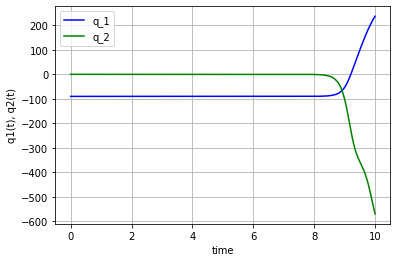

In [35]:
# set the initial conditions
x0=[-np.pi/2,0,0,0]



solutionOde=odeint(model_nlin,x0,t_sim)

plt.plot(t_sim, solutionOde[:, 0]*180/np.pi, 'b', label='q_1')
plt.plot(t_sim, solutionOde[:, 2]*180/np.pi, 'g', label='q_2')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('q1(t), q2(t)')
plt.grid()
#plt.savefig('simulation.png')
plt.show()

# Vorsteuerung

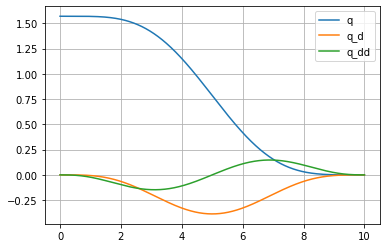

In [19]:
from Vorsteuerung import *
#from Parameter  import *

u = flat_output(t_stop,t_sim,3,np.pi/2,0)

plt.plot(t_sim,u[0,:])
plt.plot(t_sim,u[1,:])
plt.plot(t_sim,u[2,:])
plt.legend(['q','q_d','q_dd'])
plt.grid()
plt.show()





## inverse Dynamik

# set the initial conditions
x0=[np.pi/2,0,0,np.pi/4]



solutionOde=odeint(model_nlin,x0,t_sim)

plt.plot(t_sim, solutionOde[:, 0], 'b', label='q_1')
plt.plot(t_sim, solutionOde[:, 2], 'g', label='q_2')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('q1(t), q2(t)')
plt.grid()
#plt.savefig('simulation.png')
plt.show()